In [1]:
# For getting data ready
import pandas as pd
import numpy as np

# For visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Harpreet.Singh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Raw data files
daily_data = pd.read_csv('city_day.csv')
hourly_data = pd.read_csv('city_hour.csv')



In [3]:
daily_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
# Converting to datetime format and extracting the Year,Month and Day of the week from it.

daily_data['Date'] = pd.to_datetime(daily_data['Date'])

weekday_dict = {
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}



daily_data['Year'] = daily_data['Date'].dt.year
daily_data['Month'] = daily_data['Date'].dt.month_name()
daily_data['Day'] = daily_data['Date'].dt.weekday.replace(weekday_dict)


In [5]:
#First and Last Date of the recorded data

print('First Date', str(daily_data['Date'].min()))
print('Last Date', str(daily_data['Date'].max()))

First Date 2015-01-01 00:00:00
Last Date 2020-07-01 00:00:00


In [6]:

print(daily_data.shape)
daily_data.columns

(29531, 19)


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Year',
       'Month', 'Day'],
      dtype='object')

In [7]:
daily_data.dtypes

City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
Year                   int64
Month                 object
Day                   object
dtype: object

In [8]:
# List of cities where the polluution levels are checked
print(daily_data['City'].unique())

['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']


In [9]:
daily_data.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
Year              0
Month             0
Day               0
dtype: int64

In [10]:
#Buckets of AQI on the basis of their level
print(daily_data['AQI_Bucket'].unique())

[nan 'Poor' 'Very Poor' 'Severe' 'Moderate' 'Satisfactory' 'Good']


In [11]:
# Max AQI reading recorded
daily_data[daily_data['AQI']==daily_data['AQI'].max()]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day
1145,Ahmedabad,2018-02-19,242.66,NaN,132.47,199.17,246.03,NaN,132.47,NaN,44.06,0.74,5.81,3.21,2049.0,Severe,2018,February,Monday


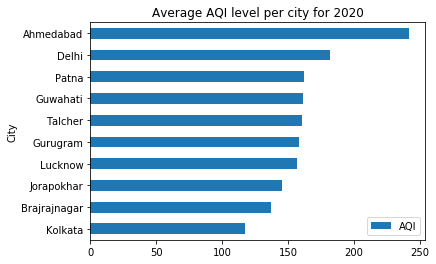

In [24]:
# Average AQI Level for 2020

AQI_data = daily_data[daily_data['AQI'].notna()]
AQI_data = AQI_data[['Year','City','AQI']]
AQI_data = AQI_data[AQI_data['Year']==2020]
#AQI_data = AQI_data.groupby('City')['AQI'].mean().sort_values().tail(10)

fig, ax = plt.subplots()
AQI_data = AQI_data.groupby('City')['AQI'].mean().sort_values().tail(10).plot(kind='barh',ax=ax)
plt.legend()
plt.title('Average AQI level per city for 2020')
plt.savefig('Top 10 cities with worst AQI.png')
plt.show()


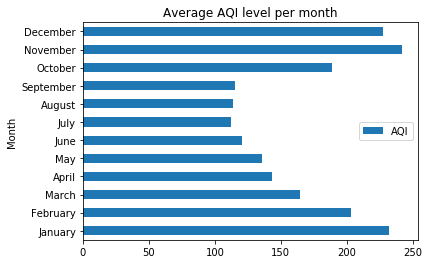

In [21]:
# Average AQI Level across the different months 

AQI_data = daily_data[daily_data['AQI'].notna()]
AQI_data = AQI_data[['Date','Month','City','AQI']]

#AQI_data = AQI_data.groupby('Month',sort=False)['AQI'].mean()

fig, ax = plt.subplots()
AQI_data.groupby('Month',sort=False)['AQI'].mean().reset_index().plot(kind='barh',x='Month',y='AQI',ax=ax)
plt.legend()
plt.title('Average AQI level per month')
plt.savefig('Worst hit months in terms of AQI.png')
plt.show()


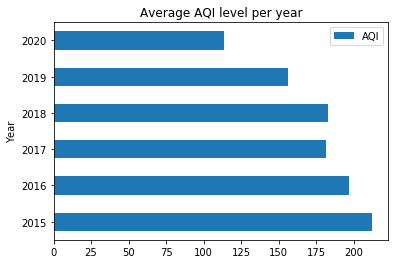

In [23]:
#AQI Level across the years from 2015-2020

AQI_data = daily_data[daily_data['AQI'].notna()]
AQI_data = AQI_data[['Date','Year','City','AQI']]

#AQI_data = AQI_data.groupby('Year')['AQI'].mean()

#plt.figure(figsize=(10,8))
fig, ax = plt.subplots()
AQI_data.groupby('Year',sort=False)['AQI'].mean().reset_index().plot(kind='barh',x='Year',y='AQI',ax=ax)
plt.legend()
plt.title('Average AQI level per year')
plt.savefig('AQI over the years.png')
plt.show()






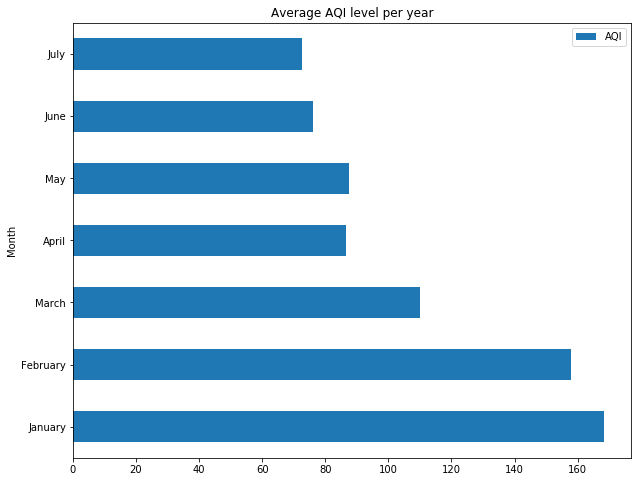

In [15]:
# Average AQI Level across the different months for the year 2020

AQI_data = daily_data[daily_data['AQI'].notna() & (daily_data['Year']==2020)]
AQI_data = AQI_data[['Date','Month','City','AQI']]

AQI_data = AQI_data.groupby('Month',sort=False)['AQI'].mean()

plt.figure(figsize=(10,8))
ax=AQI_data.plot(kind='barh')
plt.legend()
plt.title('Average AQI level per year')
plt.show()

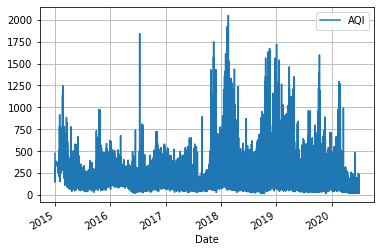

In [16]:
#Trend of AQI level across the last 5 years

AQI_data = daily_data[daily_data['AQI'].notna()]
AQI_data= AQI_data[['Date','AQI']]

fig, ax = plt.subplots()
AQI_data.plot(kind='line',x='Date',y='AQI',ax=ax,grid=True)
plt.savefig('AQI Trend.png')
plt.show()

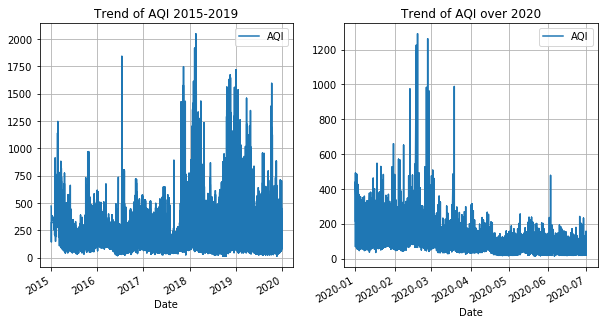

In [17]:
# Trend of average AQI levels over the last 4 years vs 2020

AQI_data_2015_2019 = daily_data[daily_data['AQI'].notna() & (daily_data['Year']!=2020) ]
AQI_data_daily_2015_2019 = AQI_data_2015_2019[['Date','AQI']]



AQI_data_2020 = daily_data[daily_data['AQI'].notna() & (daily_data['Year']==2020) ]
AQI_data_daily_2020 = AQI_data_2020[['Date','AQI']]







#ax1,ax2 = plt.gca()
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
AQI_data_daily_2015_2019.plot(kind='line',x='Date',y='AQI',grid=True,ax=ax1)
ax1.set_title('Trend of AQI 2015-2019')
AQI_data_daily_2020.plot(kind='line',x='Date',y='AQI',grid=True,ax=ax2)
ax2.set_title('Trend of AQI over 2020')

plt.savefig('AQI over 2015-2019 vs 2020.png')
plt.show()


In [18]:
# Measuring scale for levels of different pollutants
measurement = pd.read_csv('Measurement_item_info.csv')
measurement['Item name(unit)'] = measurement['Item name'] + '(' + measurement['Unit of measurement'].str.lower() + ')'
item_dict = {row['Item code']: row['Item name(unit)'] for idx,row in measurement.iterrows() }

In [19]:
daily_data.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
Year              0
Month             0
Day               0
dtype: int64

In [20]:
pollutants = measurement['Item name'].tolist()
pollutants

['SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5']

In [21]:
measurement

,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red),Item name(unit)
0,1,SO2,ppm,0.02,0.05,0.15,1.0,SO2(ppm)
1,3,NO2,ppm,0.03,0.06,0.20,2.0,NO2(ppm)
2,5,CO,ppm,2.00,9.00,15.00,50.0,CO(ppm)
3,6,O3,ppm,0.03,0.09,0.15,0.5,O3(ppm)
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0,PM10(mircrogram/m3)
5,9,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0,PM2.5(mircrogram/m3)


In [22]:
#Measures the level of each pollutant and generates a rating on the basis of data in the measurement dataframe

def evaluation_generator(good, normal, bad, vbad):
    def measurement_evaluator(value):
        if(pd.isnull(value) or value < 0):
            return np.nan
        elif(value <= good):
            return 'Good'
        elif(value <= normal):
            return 'Normal'
        elif(value <= bad):
            return 'Bad'
        else:
            return 'Very bad'
        
    return measurement_evaluator

evaluators = {
    row['Item name']: evaluation_generator(row['Good(Blue)'], row['Normal(Green)'], row['Bad(Yellow)'], row['Very bad(Red)']) 
    for idx, row in measurement.iterrows()}


for pol, func in evaluators.items():
    daily_data[pol.split()[0] + ' Level'] = daily_data[pol].map(func)

In [23]:
data_cleaned = daily_data[['City', 'Date','Year','Month', 'Day','SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5', 'SO2 Level', 'NO2 Level', 'CO Level',
       'O3 Level', 'PM10 Level', 'PM2.5 Level','AQI']]

In [24]:
data_cleaned.sample(15)

,City,Date,Year,Month,Day,SO2,NO2,CO,O3,PM10,PM2.5,SO2 Level,NO2 Level,CO Level,O3 Level,PM10 Level,PM2.5 Level,AQI
1407,Ahmedabad,2018-11-08,2018,November,Thursday,75.95,100.87,93.31,61.17,NaN,205.21,Very bad,Very bad,Very bad,Very bad,NaN,Very bad,1630.0
6869,Brajrajnagar,2018-09-10,2018,September,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25026,Patna,2018-08-06,2018,August,Monday,15.58,72.71,1.41,59.38,NaN,61.90,Very bad,Very bad,Good,Very bad,NaN,Bad,104.0
11123,Delhi,2017-06-13,2017,June,Tuesday,NaN,96.64,0.00,NaN,244.14,48.60,NaN,Very bad,Good,NaN,Very bad,Bad,112.0
23461,Mumbai,2019-05-26,2019,May,Sunday,15.93,9.62,1.36,23.81,76.72,17.07,Very bad,Very bad,Good,Very bad,Normal,Normal,71.0
19285,Kolkata,2018-12-19,2018,December,Wednesday,12.18,64.36,0.61,24.23,121.56,74.22,Very bad,Very bad,Good,Very bad,Bad,Bad,133.0
550,Ahmedabad,2016-07-04,2016,July,Monday,1.69,2.79,8.68,15.16,NaN,40.23,Very bad,Very bad,Normal,Very bad,NaN,Bad,214.0
8389,Chennai,2016-07-09,2016,July,Saturday,3.05,15.79,0.93,11.86,NaN,28.30,Very bad,Very bad,Good,Very bad,NaN,Normal,103.0
18314,Jorapokhar,2018-12-24,2018,December,Monday,83.84,7.08,NaN,37.40,249.85,NaN,Very bad,Very bad,NaN,Very bad,Very bad,NaN,NaN
12044,Delhi,2019-12-21,2019,December,Saturday,8.52,50.24,1.71,23.62,353.94,249.87,Very bad,Very bad,Good,Very bad,Very bad,Very bad,441.0


In [25]:
#Grouping of data by Date and getting the average values for each day

overview = data_cleaned.groupby('Date').mean().loc[:,'SO2':'PM2.5']

# Adding levels 
for pol, func in evaluators.items():
    overview[pol.split()[0] + ' Level'] = overview[pol].map(func)

In [26]:
# Basic statistics for our data

general = overview.describe().loc[['min', 'max', 'mean', 'std', '25%', '50%', '75%'],:].T
general['level'] = None
for idx, row in general.iterrows():
    general.loc[idx, 'level'] = evaluators[idx](row['mean'])
    
general.T

,SO2,NO2,CO,O3,PM10,PM2.5
min,3.76143,11.115,0.181,12.3589,34.16,19.2183
max,52.666,85.5575,23.2171,68.9233,607.98,313.22
mean,13.8488,28.8645,2.38071,34.865,137.355,76.5351
std,6.20644,9.54553,2.0223,8.88388,62.1491,42.4015
25%,9.365,21.8517,1.10375,28.75,88.0009,42.915
50%,12.9282,27.6492,1.89143,35.2579,131.227,66.0012
75%,17.0055,34.4443,2.98529,40.5524,173.554,101.099
level,Very bad,Very bad,Normal,Very bad,Bad,Very bad


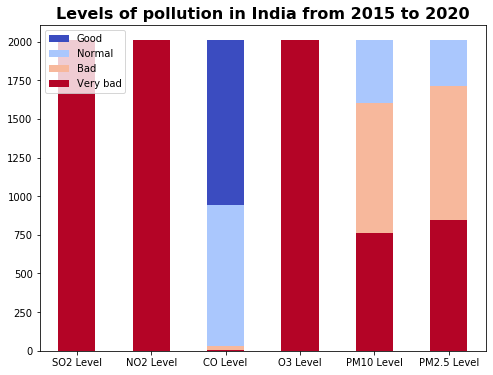

In [27]:
level_counts = pd.concat([overview[col].value_counts() for col in overview.loc[:, 'SO2 Level':]], axis=1, join='outer', sort=True).fillna(0.0)
level_counts = level_counts.loc[['Very bad', 'Bad', 'Normal', 'Good'], :]

level_counts.T.plot(kind='bar', stacked=True, figsize=(8,6), rot=0,
                    colormap='coolwarm_r', legend='reverse')
plt.title('Levels of pollution in India from 2015 to 2020', fontsize=16, fontweight='bold')
plt.savefig('AIr quality 2015-2020.png')
plt.show()

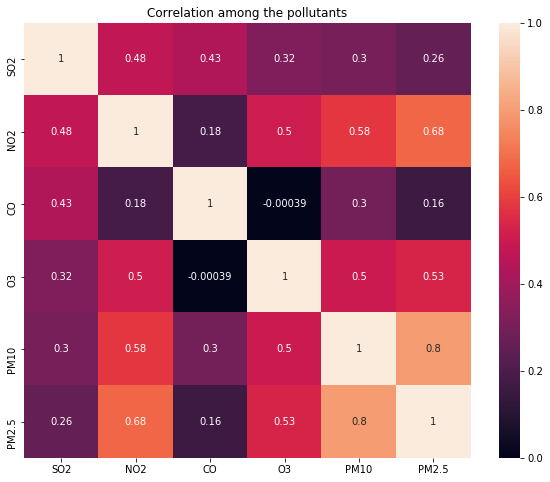

In [28]:
# Creating a correlation matrix among the different pollutants

plt.figure(figsize=(10,8))
correlations=overview.corr(method='spearman')
ax= sns.heatmap(data=correlations,annot=True,color=sns.color_palette("coolwarm", 7),)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Correlation among the pollutants")
plt.savefig('Correlation-Pollutants.png')

plt.show() # ta-da!

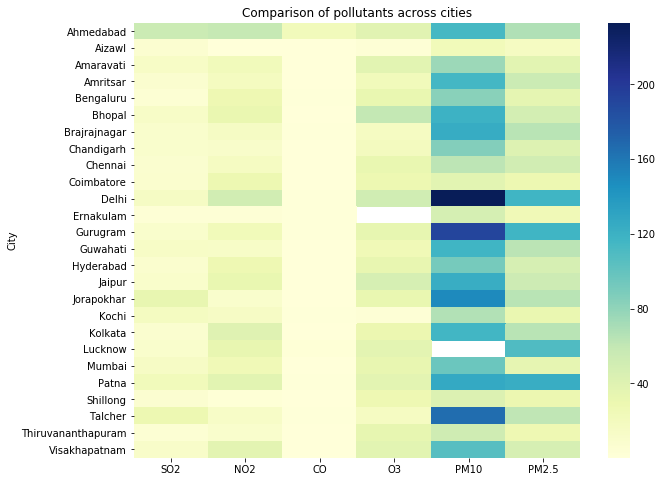

In [29]:
# Creating a correlation matrix of cities and pollutants

city_pol = data_cleaned.groupby('City').mean().loc[:,'SO2':'PM2.5']


    
plt.figure(figsize=(10,8))

ax= sns.heatmap(data=city_pol,cmap="YlGnBu",annot=False)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Comparison of pollutants across cities")
plt.savefig('Correlation-City.png')
plt.show() # ta-da!

In [30]:
data_cleaned.columns

Index(['City', 'Date', 'Year', 'Month', 'Day', 'SO2', 'NO2', 'CO', 'O3',
       'PM10', 'PM2.5', 'SO2 Level', 'NO2 Level', 'CO Level', 'O3 Level',
       'PM10 Level', 'PM2.5 Level', 'AQI'],
      dtype='object')

In [31]:
# Creating two datasets that seperates data before and after the pandemic

pre_corona=daily_data[(daily_data['Date']>='2015-01-01') & (daily_data['Date']<='2020-03-20')]
print('Pre Corona avg AQI level:',pre_corona['AQI'].dropna().mean())
post_corona=daily_data[(daily_data['Date']>='2020-03-20')]
print('Post Corona avg AQI level:',post_corona['AQI'].dropna().mean())

Pre Corona avg AQI level: 175.6702199131097
Post Corona avg AQI level: 85.32508833922262


In [32]:
top_polluting = daily_data.pivot_table(values='AQI',index='City',aggfunc=np.mean,dropna=True).sort_values(by='AQI',ascending=False).head(10).reset_index()
top_10 = top_polluting['City'].to_list()

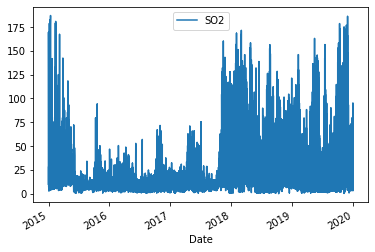

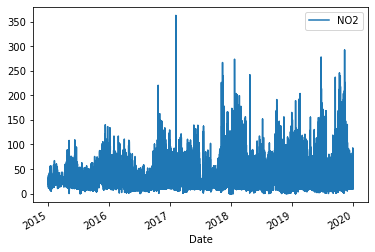

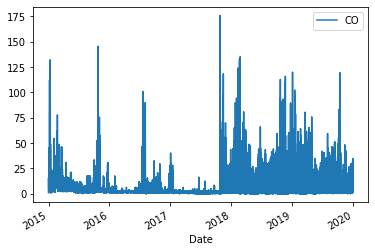

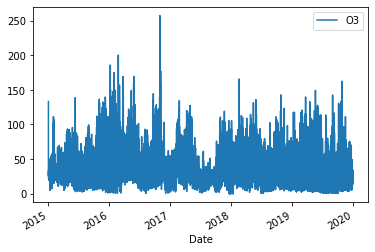

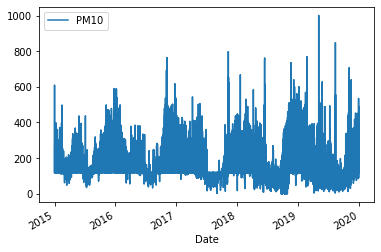

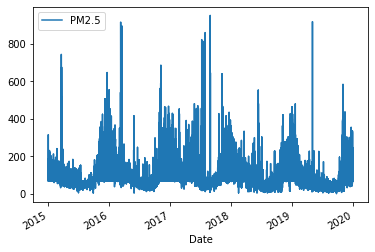

In [33]:
# Analyzing the trend of pollutants level before Corona pandemic

top_polluting_pre_corona = data_cleaned[data_cleaned['Year'] !=2020].pivot_table(values='AQI',index='City',aggfunc=np.mean,dropna=True).sort_values(by='AQI',ascending=False).head(10).reset_index()
top_10_pre_corona = top_polluting_pre_corona['City'].to_list()
top_10_data_pre_corona = data_cleaned[data_cleaned['City'].isin(top_10) & (data_cleaned['Year'] !=2020)].fillna(data_cleaned.mean())

for i in ['SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5']:
    fig, ax = plt.subplots()
    top_10_data_pre_corona.plot(x='Date',y=i,ax=ax)
    
    plt.savefig('Trend of %s pollutant for 2015-2019.png'%i)
    plt.show()
   

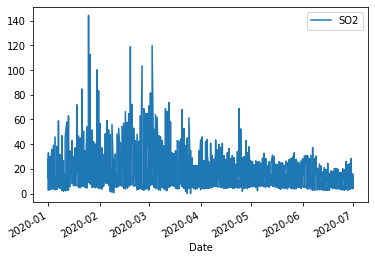

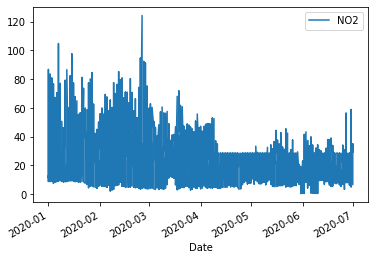

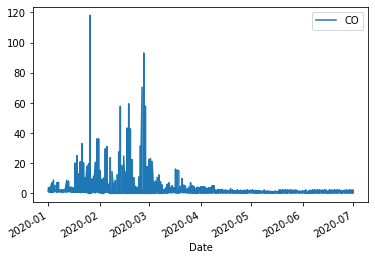

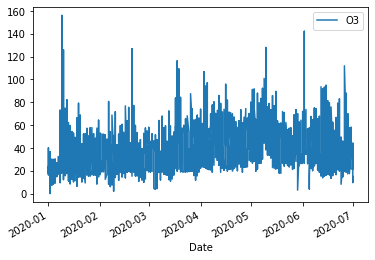

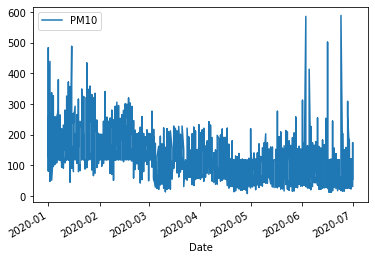

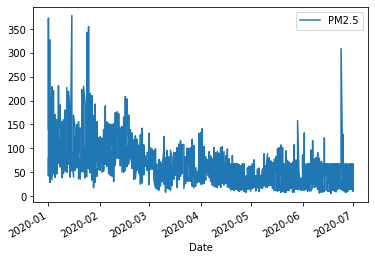

In [34]:
# Analyzing the trend of pollutants level after the Corona pandemic


top_polluting_post_corona = data_cleaned[data_cleaned['Year'] ==2020].pivot_table(values='AQI',index='City',aggfunc=np.mean,dropna=True).sort_values(by='AQI',ascending=False).head(10).reset_index()
top_10_post_corona = top_polluting_post_corona['City'].to_list()
top_10_data_post_corona = data_cleaned[data_cleaned['City'].isin(top_10) & (data_cleaned['Year'] ==2020)].fillna(data_cleaned.mean())

for i in ['SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5']:
    fig, ax = plt.subplots()
    top_10_data_post_corona.plot(x='Date',y=i,ax=ax)
    plt.savefig('Trend of %s pollutant for 2020.png'%i)
    plt.show()
    

In [35]:
print(top_10_pre_corona)
print(top_10_post_corona)

['Ahmedabad', 'Delhi', 'Patna', 'Gurugram', 'Lucknow', 'Talcher', 'Jorapokhar', 'Bhopal', 'Brajrajnagar', 'Kolkata']
['Ahmedabad', 'Delhi', 'Patna', 'Guwahati', 'Talcher', 'Gurugram', 'Lucknow', 'Jorapokhar', 'Brajrajnagar', 'Kolkata']


In [36]:
# Case Study -- Delhi and Ahmedabad
delhi_data = data_cleaned[data_cleaned['City']=='Delhi']
ahemdabad_data = data_cleaned[data_cleaned['City'] == 'Ahmedabad']

In [37]:
delhi_data.head()

,City,Date,Year,Month,Day,SO2,NO2,CO,O3,PM10,PM2.5,SO2 Level,NO2 Level,CO Level,O3 Level,PM10 Level,PM2.5 Level,AQI
10229,Delhi,2015-01-01,2015,January,Thursday,9.25,36.39,15.20,41.68,607.98,313.22,Very bad,Very bad,Very bad,Very bad,Very bad,Very bad,472.0
10230,Delhi,2015-01-02,2015,January,Friday,6.65,32.87,9.54,29.97,269.55,186.18,Very bad,Very bad,Bad,Very bad,Very bad,Very bad,454.0
10231,Delhi,2015-01-03,2015,January,Saturday,2.65,30.31,10.61,19.71,131.90,87.18,Very bad,Very bad,Bad,Very bad,Bad,Very bad,143.0
10232,Delhi,2015-01-04,2015,January,Sunday,4.63,36.91,11.54,25.36,241.84,151.84,Very bad,Very bad,Bad,Very bad,Very bad,Very bad,319.0
10233,Delhi,2015-01-05,2015,January,Monday,3.33,34.92,9.20,23.20,219.13,146.60,Very bad,Very bad,Bad,Very bad,Very bad,Very bad,325.0


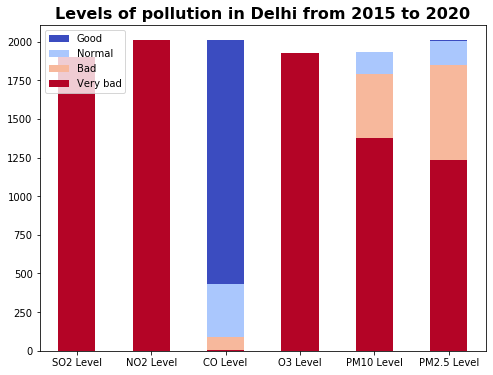

In [38]:
# An analysis on Delhi's pollution level 
overview_Delhi = data_cleaned[data_cleaned.City=='Delhi'].groupby('Date').mean().loc[:,'SO2':'PM2.5']

# Adding levels 
for pol, func in evaluators.items():
    overview_Delhi[pol.split()[0] + ' Level'] = overview_Delhi[pol].map(func)
    
    
level_counts = pd.concat([overview_Delhi[col].value_counts() for col in overview_Delhi.loc[:, 'SO2 Level':]], axis=1, join='outer', sort=True).fillna(0.0)
level_counts = level_counts.loc[['Very bad', 'Bad', 'Normal', 'Good'], :]

level_counts.T.plot(kind='bar', stacked=True, figsize=(8,6), rot=0,
                    colormap='coolwarm_r', legend='reverse')
plt.title('Levels of pollution in Delhi from 2015 to 2020', fontsize=16, fontweight='bold')
plt.savefig('Delhi Pollutants Level.png')
plt.show()

In [39]:
general_Delhi = overview_Delhi.describe().loc[['min', 'max', 'mean', 'std', '25%', '50%', '75%'],:].T
general_Delhi['level'] = None
for idx, row in general.iterrows():
    general_Delhi.loc[idx, 'level'] = evaluators[idx](row['mean'])
    
general_Delhi.T

,SO2,NO2,CO,O3,PM10,PM2.5
min,2.34,10.63,0,6.94,18.59,10.24
max,71.56,162.5,30.44,257.73,796.88,685.36
mean,15.9013,50.7852,1.97605,51.3236,232.809,117.196
std,7.96677,22.6967,2.56025,26.0623,121.873,82.9129
25%,10.335,33.895,0.91,33.71,137.04,57.095
50%,14.45,47.15,1.24,44.44,216.73,94.62
75%,19.7,63.57,1.87,60.84,311.668,153.03
level,Very bad,Very bad,Normal,Very bad,Bad,Very bad


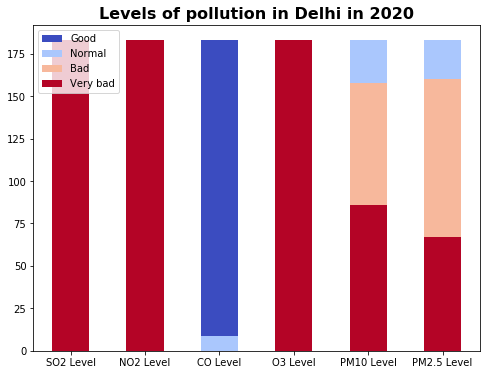

In [40]:
# An analysis on Delhi's pollution level post Corona
overview_Delhi_2020 = data_cleaned[(data_cleaned.City=='Delhi') & (data_cleaned.Year==2020)].groupby('Date').mean().loc[:,'SO2':'PM2.5']

# Adding levels 
for pol, func in evaluators.items():
    overview_Delhi_2020[pol.split()[0] + ' Level'] = overview_Delhi_2020[pol].map(func)
    
    
level_counts = pd.concat([overview_Delhi_2020[col].value_counts() for col in overview_Delhi_2020.loc[:, 'SO2 Level':]], axis=1, join='outer', sort=True).fillna(0.0)
level_counts = level_counts.loc[['Very bad', 'Bad', 'Normal', 'Good'], :]

level_counts.T.plot(kind='bar', stacked=True, figsize=(8,6), rot=0,
                    colormap='coolwarm_r', legend='reverse')
plt.title('Levels of pollution in Delhi in 2020', fontsize=16, fontweight='bold')
plt.savefig('Delhi Pollutants Level(2020).png')

plt.show()

In [41]:
general_Delhi_2020 = overview_Delhi_2020.describe().loc[['min', 'max', 'mean', 'std', '25%', '50%', '75%'],:].T
general_Delhi_2020['level'] = None
for idx, row in general.iterrows():
    general_Delhi_2020.loc[idx, 'level'] = evaluators[idx](row['mean'])
    
general_Delhi_2020.T

,SO2,NO2,CO,O3,PM10,PM2.5
min,7.28,14.36,0.52,17.63,34.15,21.23
max,26.05,67.09,3.32,76.32,483.87,372.14
mean,13.9124,33.2017,1.05776,40.6499,157.034,80.318
std,3.21065,13.8443,0.432289,11.8427,78.6337,55.9006
25%,11.565,21.295,0.82,32.43,96.255,41.005
50%,13.33,30.92,0.93,40.26,144.37,59.52
75%,15.86,44.275,1.175,48.475,198.07,102.735
level,Very bad,Very bad,Normal,Very bad,Bad,Very bad


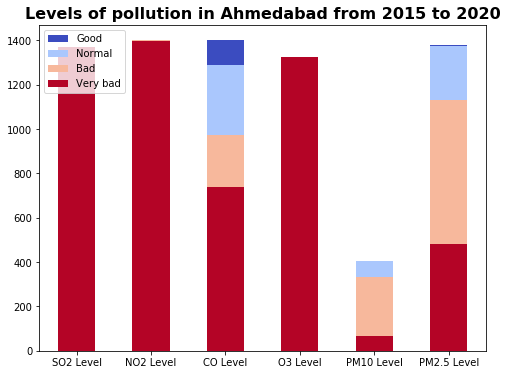

In [42]:
# An analysis on Ahmedabad's pollution level 


overview_Ahmedabad = data_cleaned[data_cleaned.City=='Ahmedabad'].groupby('Date').mean().loc[:,'SO2':'PM2.5']

# Adding levels 
for pol, func in evaluators.items():
    overview_Ahmedabad[pol.split()[0] + ' Level'] = overview_Ahmedabad[pol].map(func)
    
    
level_counts = pd.concat([overview_Ahmedabad[col].value_counts() for col in overview_Ahmedabad.loc[:, 'SO2 Level':]], axis=1, join='outer', sort=True).fillna(0.0)
level_counts = level_counts.loc[['Very bad', 'Bad', 'Normal', 'Good'], :]

level_counts.T.plot(kind='bar', stacked=True, figsize=(8,6), rot=0,
                    colormap='coolwarm_r', legend='reverse')
plt.title('Levels of pollution in Ahmedabad from 2015 to 2020', fontsize=16, fontweight='bold')
plt.savefig('Ahmedabad Pollutants Level.png')

plt.show()

In [43]:
general_Ahmedabad = overview_Ahmedabad.describe().loc[['min', 'max', 'mean', 'std', '25%', '50%', '75%'],:].T
general_Ahmedabad['level'] = None
for idx, row in general.iterrows():
    general_Ahmedabad.loc[idx, 'level'] = evaluators[idx](row['mean'])
    
general_Ahmedabad.T

,SO2,NO2,CO,O3,PM10,PM2.5
min,0.52,0.08,0.06,0.38,11.5,3.04
max,186.08,292.02,175.81,162.43,586.27,381.69
mean,55.2537,59.0255,22.1934,39.1554,114.584,67.8545
std,39.7838,47.2834,21.6418,22.5837,45.7226,39.4914
25%,21.64,20.47,7.5075,22.5575,86.765,39.43
50%,46.78,47.19,16.245,39.51,107.96,58.37
75%,79.76,83.28,29.945,53.125,134.39,87.18
level,Very bad,Very bad,Normal,Very bad,Bad,Very bad


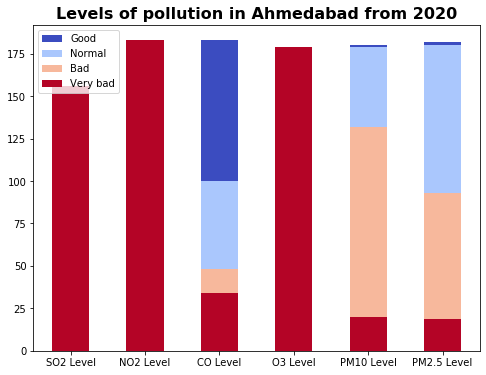

In [44]:
# An analysis on Ahmedabad's pollution level post Corona


overview_Ahmedabad_2020 = data_cleaned[(data_cleaned.City=='Ahmedabad') & (data_cleaned.Year==2020)].groupby('Date').mean().loc[:,'SO2':'PM2.5']

# Adding levels 
for pol, func in evaluators.items():
    overview_Ahmedabad_2020[pol.split()[0] + ' Level'] = overview_Ahmedabad_2020[pol].map(func)
    
    
level_counts = pd.concat([overview_Ahmedabad_2020[col].value_counts() for col in overview_Ahmedabad_2020.loc[:, 'SO2 Level':]], axis=1, join='outer', sort=True).fillna(0.0)
level_counts = level_counts.loc[['Very bad', 'Bad', 'Normal', 'Good'], :]

level_counts.T.plot(kind='bar', stacked=True, figsize=(8,6), rot=0,
                    colormap='coolwarm_r', legend='reverse')
plt.title('Levels of pollution in Ahmedabad from 2020', fontsize=16, fontweight='bold')
plt.savefig('Ahmedabad Pollutants Level(2020).png')

plt.show()

In [45]:
general_Ahmedabad_2020 = overview_Ahmedabad_2020.describe().loc[['min', 'max', 'mean', 'std', '25%', '50%', '75%'],:].T
general_Ahmedabad_2020['level'] = None
for idx, row in general.iterrows():
    general_Ahmedabad_2020.loc[idx, 'level'] = evaluators[idx](row['mean'])
    
general_Ahmedabad_2020.T

,SO2,NO2,CO,O3,PM10,PM2.5
min,2.42,11.65,0.28,4.08,11.5,12.1
max,144.29,124.33,118,81.35,586.27,137.81
mean,37.553,31.0848,8.82317,43.6843,107.569,43.3427
std,24.2507,18.3701,15.8246,14.238,52.7683,22.6929
25%,19.905,17.9,0.575,34.665,79.1225,26.7225
50%,31.925,25.02,3.35,43.63,94.075,35.89
75%,49.58,37.965,9.675,53.925,125.362,56.1025
level,Very bad,Very bad,Normal,Very bad,Bad,Very bad


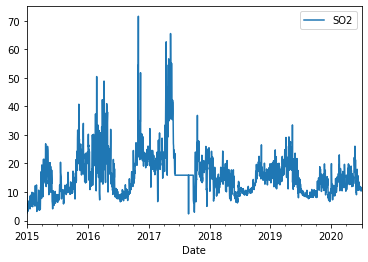

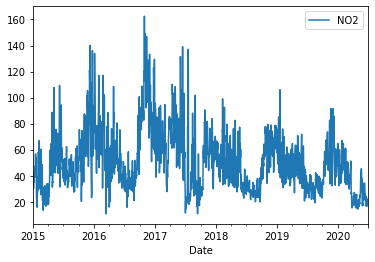

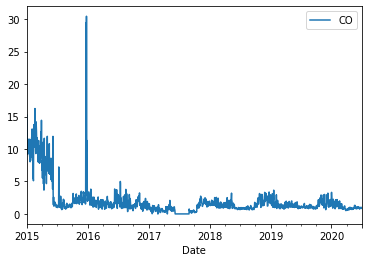

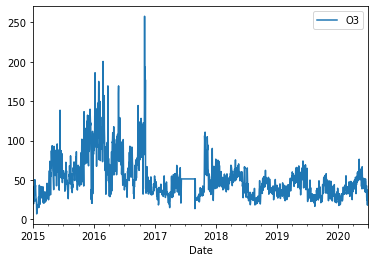

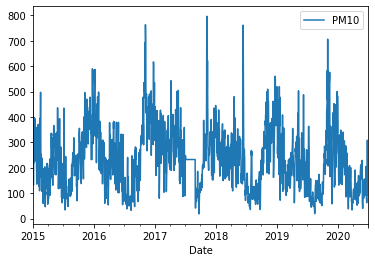

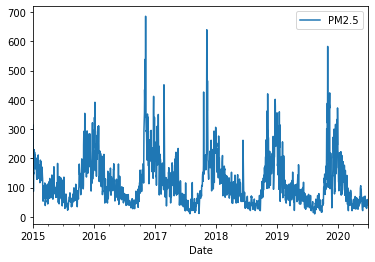

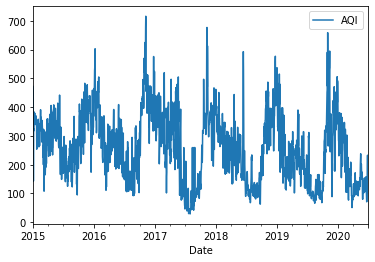

In [46]:
# Trend of pollutants level over the 5 years
delhi_data = delhi_data.fillna(delhi_data.mean())

for i in ['SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5','AQI']:
    
    fig, ax = plt.subplots()
    delhi_data.plot(x='Date',y=i,ax=ax)
    plt.savefig('Trend of %s pollutant for Delhi.png'%i)
    plt.show()

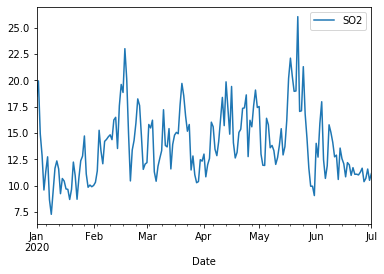

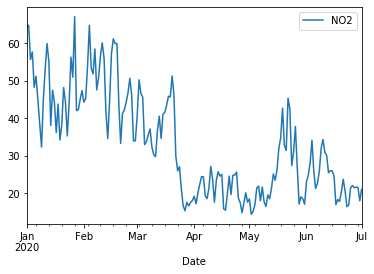

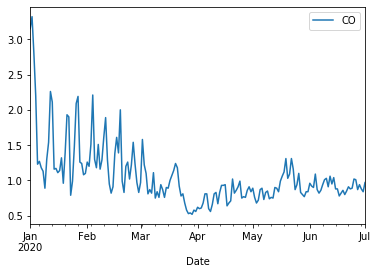

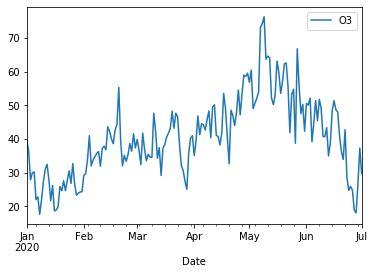

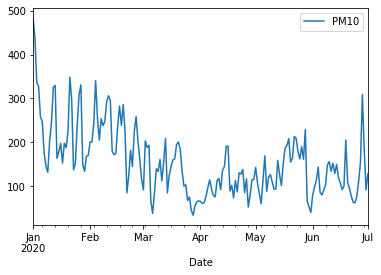

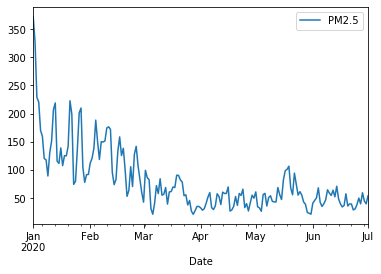

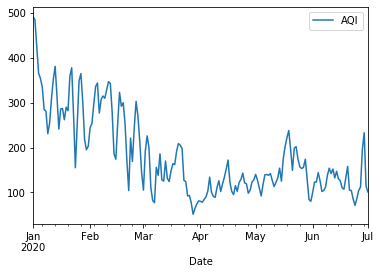

In [47]:
# Trend of pollutants level in 2020


delhi_data_2020 = delhi_data[delhi_data['Year']==2020]

for i in ['SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5','AQI']:
       
    fig, ax = plt.subplots()
    delhi_data_2020.plot(x='Date',y=i,ax=ax)
    plt.savefig('Trend of %s pollutant for Delhi(2020).png'%i)
    plt.show()
    

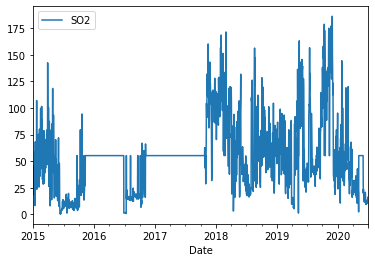

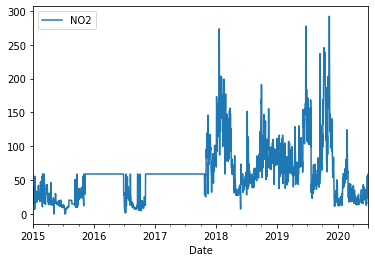

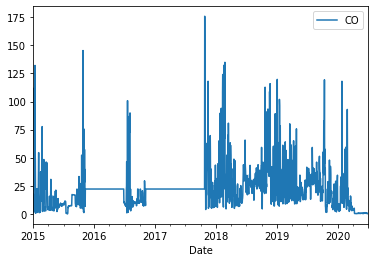

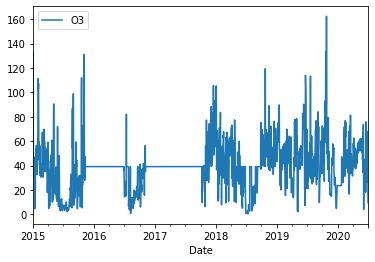

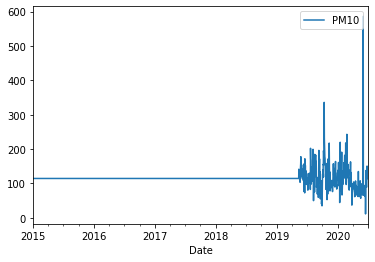

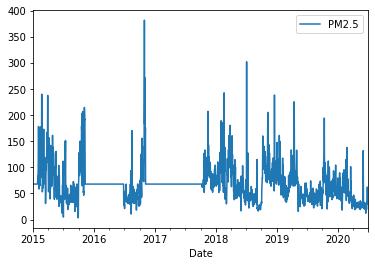

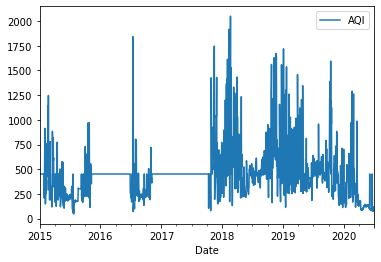

In [48]:
# Trend of pollutants level over the 5 years


ahemdabad_data = ahemdabad_data.fillna(ahemdabad_data.mean())

for i in ['SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5','AQI']:
    fig, ax = plt.subplots()
    ahemdabad_data.plot(x='Date',y=i,ax=ax)
    plt.savefig('Trend of %s pollutant for Delhi(2020).png'%i)
    plt.show()

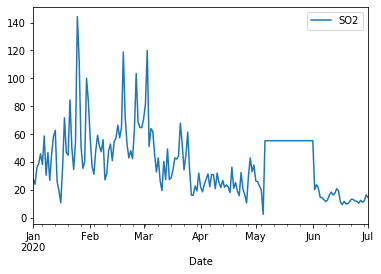

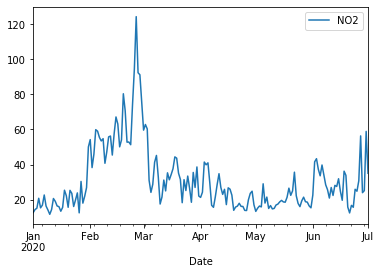

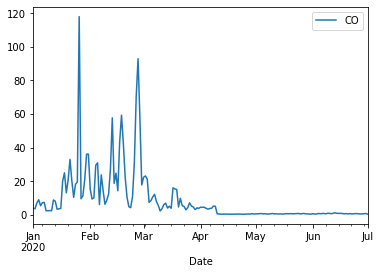

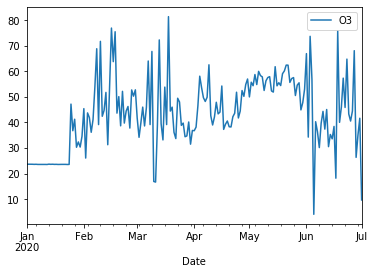

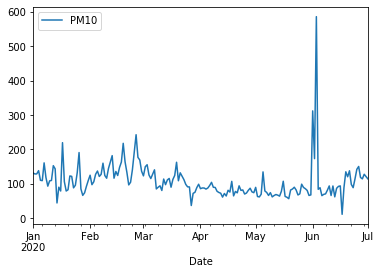

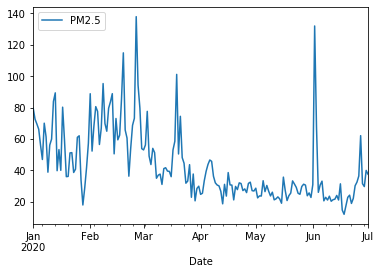

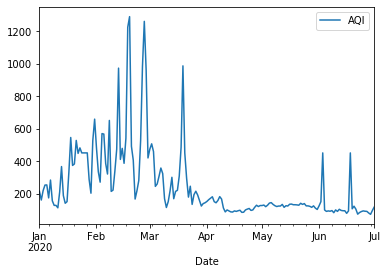

In [49]:
# Trend of pollutants level in 2020


ahemdabad_data_2020 = ahemdabad_data[ahemdabad_data['Year']==2020]

for i in ['SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5','AQI']:
    fig, ax = plt.subplots()
    ahemdabad_data_2020.plot(x='Date',y=i,ax=ax)
    plt.savefig('Trend of %s pollutant for Delhi(2020).png'%i)
    plt.show()